## Kapittel 1. Innledning 

Regjeringen skriver i en pressemeldning (Regjeringen, 2023) at de vil gi kommuner muligheten til å innføre en turistskatt - eller et besøksbidrag som de velger å kalle det. Regjeringen jobber i denne sammenheng med flere tiltak som skal bidra til en konkurransedyktig, helårlig næring som er bærekraftig og mer lønnsom. Regjeringen vil lansere en handlingsplan for reiselivet før sommeren. Handlingsplanen skal legge føringer for regjeringens prioriteringer og inkludere pilotprosjekter for turistskatt. Populære turistattraksjoner slik som Nordkapp, Beitostølen og Lofoten er alle opp til vurdering.

For at turistskatten skal ha slike hensiktsmessige virkninger må den planlegges godt. Hvor stor skal skatten være? Og hvordan bør skatteinntektene forvaltes? Dersom regjeringen misslykkes med disse problemstillingene kan skatten ende opp med å skade turistnæringen, og heller redusere den samlede velferden. 


#### Hvorfor turistskatt?

En turistskatt kan dekke de negative eksternaliteter forårsaket av turisme. Turisme har en betydning for både lokal samfunn og Norsk økonomi som helhet, det skapes verdier. Men turisme har også endel negative konsekvenser: Turisme forurenser naturen, skaper press og slitasje på infrastrukturen og undergraver den lokale kultur. For å forebygge dette kan myndighetene innføre en skatt på turisme. En skatt på turisme vil generere inntekter, disse inntektene kan brukes til å forbedre goder som er tilknyttet lokal miljøet og reiselivet. Det kan bety bedre tilretteleggelse av aktiviteter, noe som igjen kan bidra til at næringen blir mer helårlig og bærekraftig, samtidig som at lokal samfunnet får dekket de samfunnmessige kostnadene.  

Turistattraksjoner slik som Lofoten har flere fellesgoder som ikke tilfaller de enkelte næringsvirksomhetene, men som er av betydning for destinasjonenes attraksjons verdi. Tilrettelegging av ulike aktiviteter, informasjon, opplevelser og miljøet på reisemålet er alle viktige faktorer som påvirker opplevelsen av et reisemål. Det er ikke bare reiselivsaktørene som bidrar til den totale opplevelsen. Staten, fylkeskommuner, kommuner, frivillighet bidrar også, alle i ulik grad og på forskjellige måter til å finansiere goder som er tilknyttet reiselivet (Regjeringen, 2023). Disse godene har en betydning for aktørenes kundegrunnlag og omsetning. Fellesgodene kan ved hjelp av turistskatt eller et besøksbidrag finansieres og bidra til økt velferd

### Hvor utbredt er inngrepet andre steder? 

Overturisme har lenge vært et problem i større turist nasjoner. I 2011 innførte Italia en turistskatt på hotellovernattinger.

Utredningen er strukturert slik: I kapittel 2 vil utredningen ta for seg turistnæringen i Norge. Kapittelet vil i den sammenheng undersøke de ulike virksomhetene (produsentene) og hvordan disse har utviklet seg over tid. Kapittelet vil også undersøke kundegruppen (etterspørrene). Hvordan er kundegruppenen satt sammen og i hvilke segmenter. Kapittel 3 vil dreie seg om de samfunnsøkonomiske virknignene av skatten, hvordan effektsvirkning og fordelingsvirkning har tiltaket på aktørene, og hva forutsetningene er for at turistskatten skal være vellykket. Kapittel 4 vil innholde en oppsummering av funnene og råd til nærings -og fiskeridepartementet. 

## Kapittel 2. Turisnæringen i Norge.

Turisme er et økonomisk, sosialt og kulturelt fenomen. Turisme blir ifølge The United Nations World Tourism Organization (UNTWO) definert som aktiviteten å reise til steder som er utenfor den vanlige fritidssfæren (Clark et al., 2020, s. 155.). Norge og spesielt Nord-Norge har flere arktiske aspekter deriblant urørt natur, nordlys og midnattssol. Det arktiske klimaet og naturen rundt blir hyppig brukt som turterreng både på sommer og vinter. Disse godene har naturligvis en verdi for både reiselivet og Norge som turistattraksjon. 

Ved økt turisme vil det være samfunnsmessig hensiktsmessig at man balanserer økonomisk vekst med å ivareta natur og kultur. Derfor bør reiselivet utnytte ressursene på best mulig måte. I lys av dette har UNTWO arbeidet for å promotere utvikling i bærekraftig turisme. Turisme skal i henhold til «2030 Agenda for Sustainable Development Goals» ivareta det økologiske, opprettholde det kulturelle, og respektere de sosial kulturelle verdiene (Clark, et al., 2020, s. 157). Turisme skaper inntekter, og disse inntektene kan forvaltes slik at de gagner samfunnet i form av sosiale tjenester eller lignende. Miljømessige tiltak er også viktig, særlig i arktiske strøk med mye urørt natur og en sårbar urbefolkning. 

Turisme er viktig økonomisk, både fordi det skaper arbeidsplasser og fordi det skaper inntekter. Det er flere virksomheter som livnærer seg på turisme: 
-	Overnattingsvirksomhet som består av hoteller, campingplasser, privat utleie og annen overnatting. De store hotellkjedene dominerer overnattingsbransjen i Norge. 
-	Serveringsvirksomhet som består av restauranter, kafeer, catering barer og puber. 
-	Transportvirksomhet omfatter bedrifter som frakter passasjerer med fly, ferger, jernbane og buss. Disse bedriftene er ofte ikke lokalisert der kundene er. Det er få bedrifter, men store. Som for eksempel Norwegian, SAS, Hurtigruten og Fjord1. 
-	Reisebyrå og reisearrangørvirksomhet som består av reiseguider og ledere eller større aktører som byråer. Disse er ofte sentralisert, men salgsstedene befinner seg der kundene er. 

Disse næringene er sesongbaserte, noe som er et problem for sysselsettingen. Turistnæringen har også nettopp vært igjennom en tøff pandemi, noe som har resultert i permitteringer og tap av inntjening. Figur 1.1 viser sysselsetting i reiselivnæringen, som gir oss et overblikk på virksomhetenes størrelse. 

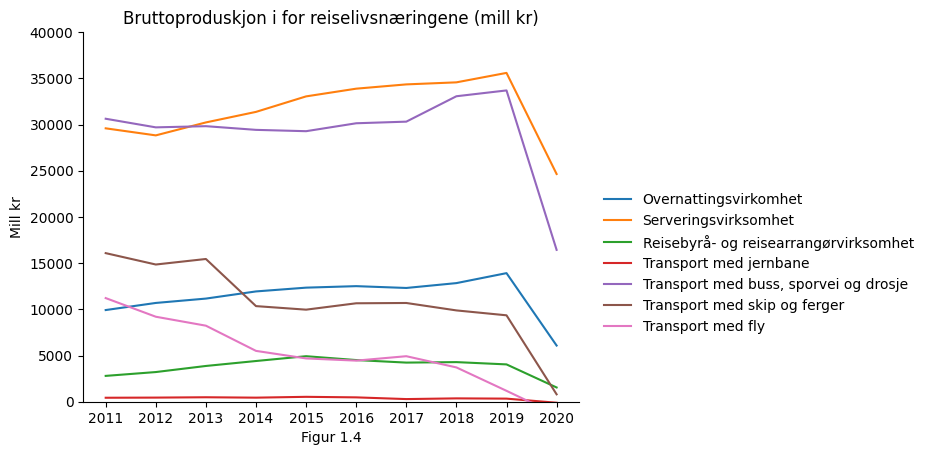

In [ ]:
postUrl = "https://data.ssb.no/api/v0/no/table/10603/"

apiQuery = {
  "query": [
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "OTV",
          "SEV",
          "TRJ",
          "TRBSD",
          "TRSF",
          "TRF",
          "RBAV"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

overnatting = df.loc[(df['reiselivsnæring'] == 'Overnattingsvirksomhet') & (df['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
servering = df.loc[(df['reiselivsnæring'] == 'Serveringsvirksomhet') & (df['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
reise_arrangør = df.loc[(df['reiselivsnæring'] == 'Reisebyrå- og reisearrangørvirksomhet') & (df['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
transport_jernbarne = df.loc[(df['reiselivsnæring'] == 'Transport med jernbane') & (df['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
transport_buss = df.loc[(df['reiselivsnæring'] == 'Transport med buss, sporvei og drosje') & (df['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
transport_skip = df.loc[(df['reiselivsnæring'] == 'Transport med skip og ferger') & (df['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
transport_fly = df.loc[(df['reiselivsnæring'] == 'Transport med fly') & (df['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]


fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(overnatting['år'], overnatting['value'], label = 'Overnattingsvirkomhet')
ax.plot(servering['år'],servering['value'], label = 'Serveringsvirksomhet')
ax.plot(reise_arrangør['år'],reise_arrangør['value'], label = 'Reisebyrå- og reisearrangørvirksomhet')
ax.plot(transport_jernbarne['år'],transport_jernbarne['value'], label = 'Transport med jernbane')
ax.plot(transport_buss['år'],transport_buss['value'], label = 'Transport med buss, sporvei og drosje')
ax.plot(transport_skip['år'],transport_skip['value'], label = 'Transport med skip og ferger')
ax.plot(transport_fly['år'],transport_fly['value'], label = 'Transport med fly')
ax.set_title('Bruttoproduskjon i for reiselivsnæringene (mill kr)')
ax.set_ylabel('Mill kr')
ax.set_xlabel('Figur 1.1')
ax.set_ylim(0,40000)

ax.legend(bbox_to_anchor=(1.7,0.6), frameon = False);


In [24]:
import json
import pandas as pd
import requests
from pyjstat import pyjstat

postUrl = "https://data.ssb.no/api/v0/no/table/10604/"

apiQuery = {
  "query": [
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "OTV",
          "SEV",
          "TRJ",
          "TRBSD",
          "TRSF",
          "TRF",
          "RBAV"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [10]:
df_transport = df[2:6] # Index for virksomhetene innen transport.  

sum = df_transport['value'].sum() # Jeg summerer virksomhetene innenfor transport.

df2 = pd.DataFrame([["Transportvirksomhet", "Sysselsetting (1 000 årsverk, heltidsekvivalen...", 2020, sum]], columns= df.columns) 
# Lager en ny row med de aggregerte verdiene. 

df2 = pd.concat([df,df2]) # Slår sammen dataframes. 

df2 = df2.drop(df2.index[[2,3,4,5]], axis= 0)

df2 = df2.reset_index() # Ny index for ryddighet. 

df2 = df2.drop('index', axis = 1) # Fjerner gammel index. 

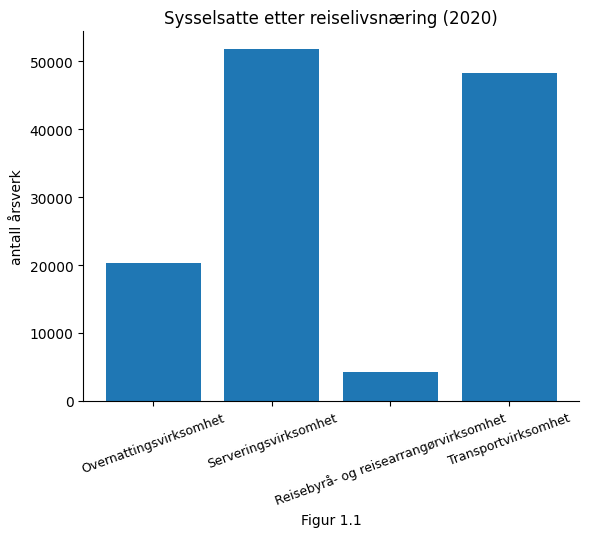

In [11]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.bar(df2['reiselivsnæring'],df2['value']*1000) # Ganger med 1000 for å få reele verdier. 
ax.set_ylabel('antall årsverk')
ax.set_xlabel('Figur 1.1')
ax.set_title('Sysselsatte etter reiselivsnæring (2020)')
ax.xaxis.set_tick_params(labelsize=9, rotation = 20) # Roterer labels. 

Merk at tallene er fra 2020, etter utbruddet av korona pandemien, og at dette naturligvis påvirker verdiene. Figur 1.1 viser antall årsverk og vi  ser store forskjeller mellom virksomhetenes sysselsetting. Serveringsvirksomheten er den største med litt i overkant av 50 000 årsverk, transportvirksomheten er den nest største, med litt i underkant av 50 000 årsverk. Reisebyrå- og reisearrangørvirksomhet er den minste næringen med ca. 4000 årsverk. Overnattingsvirksomheten har ca. 20 000 årsverk. 

In [12]:
postUrl = "https://data.ssb.no/api/v0/no/table/10638/"

apiQuery = {
  "query": [
    {
      "code": "KonsumInnd",
      "selection": {
        "filter": "item",
        "values": [
          "TOTK",
          "UTLK",
          "NOHT",
          "NONF"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

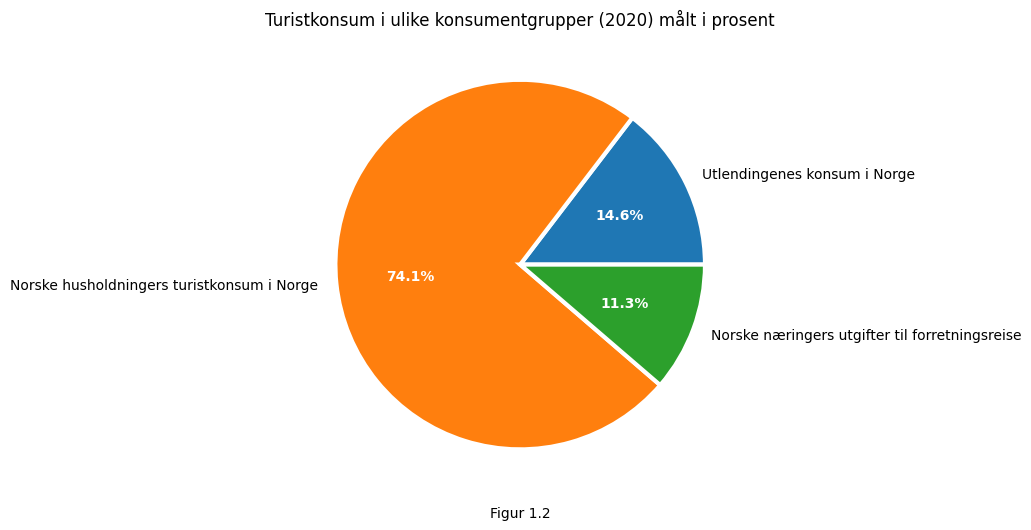

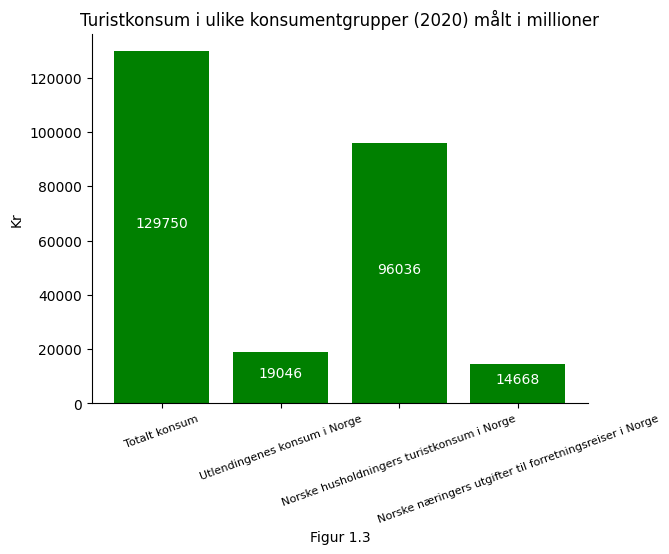

In [13]:
df_konsum = df[1:4]
df_konsum_pros = df_konsum['value']/129750*100 

df_konsum_pros # Her er prosentene jeg bruker i pie chart (slices). 
df_konsum # Her er verdiene jeg bruker i bar chart. 

slices = [14.6,74,11.3]
labels = ["Utlendingenes konsum i Norge", "Norske husholdningers turistkonsum i Norge", "Norske næringers utgifter til forretningsreise"]

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    slices, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'})
ax.set_title('Turistkonsum i ulike konsumentgrupper (2020) målt i prosent')
ax.set_xlabel('Figur 1.2')
plt.setp(pcts, color='white', fontweight='bold')

x = ['Totalt konsum', 'Utlendingenes konsum i Norge', 'Norske husholdningers turistkonsum i Norge', 
     'Norske næringers utgifter til forretningsreiser i Norge']
y = [129750, 19046, 96036, 14668]

def addlabels(x,y):  # Lager en funksjon for labels. 
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center', color = 'white')  

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.bar(df['konsumentgruppe'],df['value'], color = 'green')
addlabels(x,y)
ax.xaxis.set_tick_params(labelsize=8, rotation = 20)
ax.set_xlabel('Figur 1.3')
ax.set_ylabel('Kr')
ax.set_title('Turistkonsum i ulike konsumentgrupper (2020) målt i millioner');

Det vil også være forskjeller i konsumentgrupper og kundesegmenter. Figur 1.2 og 1.3 viser turistkonsumet fordelt på de ulike konsumentgruppene i faste 2020 priser. Konsumentgruppen - Norske husholdnigers turistkonsum - inneholder både lokalbefolkning og den Norske-turismen innad i Norge. Den Norske husholdningens turistkonsum utgjør hele 74.1 prosent av det totale turist konsumet. En del av forklaringen ligger i at lokalbefolkningen er den viktigste gruppen for serveringsbransjen. Norske husholdningers turistkonsum dominerer også kundegruppen innen reisebyrå og arrangørvirksomheten, da spesielt nordmenns pakkereiser til utlandet. Norskehusholdningers turistkonsum har dog liten betydning for overnattingsvirksomhetene. Utlendingenes konsum utgjør kun 14,6 prosent av det totale turistkonsumet, men for overnattingsvirksomhetene står utlendinger for nesten 39 prosent av alle inntektene. Norske yrkesreisende og utlendinger er den viktigste kundegruppen for overnattings -og transportvirksomhetene. Ifølge SSB sitt satellittregnskap var den samlede inntekten fra utenlandske gjester i overnattingsvirksomhetene 59 milliarder kroner i 2019 (Jakobsen et al., 2021).

Kundesegmentets betydning, både totalt og innenfor hver av bransjene, varierer mellom regionene i Norge. I Nord-Norge står lokalbefolkningen for 20 prosent av omsetning i reiselivet, mens i Oslo er andelen 38 prosent. Utenlandske gjester står for 32 prosent i Nord-Norge, 27 prosent på Vestlandet, mens bare 11 prosent på Sørøstlandet (Jakobsen et al,. 2021, s. 6). 

## Kapittel 3. Samfunnsøkonomiske effekter av en turistskatt

I markedsøkonomien er vi opptatt av hvordan prisdannelse skjer i et marked. Et annet viktig spørsmål er om markedsløsningen er samfunnsøkonomisk effektiv. Vi ønsker at det samfunnsmessige overskuddet skal bli så høyt som mulig, fordi dette danner høyest mulig velferd. 

I det følgende skal jeg vurdere de samfunnsøkonomiske effektene av en turistskatt. Jeg vil innlede med generisk eksempel på en turistskatt. Figur 1.4 viser markedslikevekt med og uten en turistskatt. I eksemplet tar jeg utgangspunkt i modellen for fullkommen konkurranse, der aktørene i markedet ikke har markedsmakt - prisen og omsatt mengde blir dannet igjennom et samspill av alle tilbydere og etterspørrere. Denne markedsformen er nyttig å ha som grunnlag for sammenligning med andre markedsformer fordi den sikrer samfunnsøkonomisk effektiv ressursstyring. Selv om markedet for turister kan være ulikt, er det ikke urimelig å anta at markedet i de fleste tilfeller vil reagere ganske likt som et marked med fullkommen konkurranse. Sammenhengen mellom effektiv ressursstyring og velferd er åpenbar: ønsker samfunnet å få mest mulig velferd ut av de ressursene som er tilgjengelig, må ressursene utnyttes samfunnsøkonomisk effektivt. 

Med en turistskatt på t som legges på tilbyderne kan vi skrive etterspørsel som en funksjon:

\begin{equation}
   x^{D}= D(p)\tag{1}
\end{equation}

og tilbud:

\begin{equation}
   x^{S}= S(p-t)\tag{2}
\end{equation}

Vi kan forklare tilbud og etterspørselfunksjonene generelt. Etterspørselen er en funksjon av prisen. Kurven er fallende fordi vi antar at de som allerede har kjøpt godet er i stand til å kjøpe mer når godet faller i pris, i tillegg økes etterspørselen når prisen går ned som skyldes at konsumentene som ikke hadde råd til godet tidligere nå har råd til godet. Tilbudet er også en funksjon av pris, der tilbudet øker når prisen øker. Dette kan forklares ved at når prisen øker vil produsentene være til villig til å produsere mer av godet. I figur 1.4 ser vi at likevektspunktet L, er der mengden av varer eller tjenester som blir etterspurt er lik mengden som produseres. I dette punktet får produsentene dekket sine produksjonskostnader og konsumentene betaler det de mener godet er verdt. 

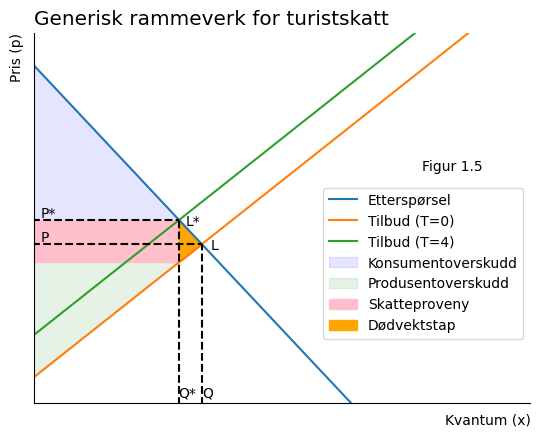

In [139]:
import sympy as sp
import numpy as np

def x_d(p):
    return 500-3.2*(p)

def x_s(p,t):
    return -100 + 4.3*(p-t)


x,p,t =sp.symbols('x p t', real=True, positive=True)

# lager ligning 
equ=sp.Eq(x_d(p), x_s(p,t))

# finner likevektspris. 
p_eq = sp.solve(equ,p)
p_eq = 80

# finner likevektskvantum.
x_eq= x_d(p_eq)
x_eq = 244

# ligning med avgift
equ2=sp.Eq(x_d(p), x_s(p,4))

# likevektpris med avgift
p_eq2 = sp.solve(equ2,p)
p_eq2 = float(p_eq2[0])
round(p_eq2,2)

# likevektskvantum med avgift
x_eq2= x_d(p_eq2)
x_eq2 = float(x_eq2)
round(x_eq2,2)

# Lager inverse funksjoner
eqd = sp.Eq(500-3.2*p,x)
eqd_p = sp.solve(eqd,p)
eqs = sp.Eq(-100 + 4.3*(p-t),x)
eqs_p = sp.solve(eqs,p)

# Definerer inversefunksjoner 
def x_d2(x):
    return 156.25 - 0.3125*x

def x_s2(x,t): 
    return t + 0.232558139534884*x + 23.2558139534884

x_num=np.linspace(1,1000,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(190,350))
                ax.set(ylim=(65,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_title('Generisk rammeverk for turistskatt', loc = 'left', size = 'x-large')
                ax.annotate('Figur 1.5',xy=(315,87))

                return fig, ax

fig, ax = create_ax()

ax.plot(x_num,x_d2(x_num), label = 'Etterspørsel') # Plotter funksjoner
ax.plot(x_num,x_s2(x_num,0), label = 'Tilbud (T=0)')
ax.plot(x_num,x_s2(x_num,4), label = 'Tilbud (T=4)')

ax.vlines(x_eq,0,p_eq, color='black',ls='dashed')
ax.hlines(p_eq2,0,x_eq2, color='black',ls='dashed')
ax.vlines(x_eq2,0,p_eq2, color='black',ls='dashed')
ax.hlines(p_eq,0,x_eq, color = 'black', ls = 'dashed')

z=np.linspace(60,x_eq,100)
y=np.linspace(60,x_eq2,100)
q=np.linspace(x_eq2,x_eq,100)

ax.fill_between(z,p_eq,x_d2(z),color = "blue",alpha = 0.1,label='Konsumentoverskudd')
ax.fill_between(z,p_eq,x_s2(z,0),color = "green",alpha = 0.1,label='Produsentoverskudd')
ax.fill_between(y,p_eq2-4,p_eq2, color = 'pink',label = 'Skatteproveny')
ax.fill_between(q,x_s2(q,0),x_d2(q), color = "orange", alpha = 1, label = "Dødvektstap" )

plt.xticks([])
plt.yticks([])

ax.annotate('Q', xy = (244,65.5))
ax.annotate('Q*', xy = (236.5,65.5))
ax.annotate('P' , xy = (192,80.2))
ax.annotate('P*', xy = (192,82.5))
ax.annotate('L', xy = (247,79.5))
ax.annotate('L*', xy = (238.8,81.8))

ax.legend(bbox_to_anchor=(1,0.6));


##### Konsumenten

Etterspørselen i figur 1.4 er avtakende, og vi tolker dette som at konsumenten sin vilje til å betale for en ekstra enhet også er fallende. 
Etterspørselskurven er derfor rangert etter det vi kaller for konsumentenes fallende marginale betalingsvillighet. Marginal betlingsvillighet er en god indikator på grensenytte (nytten konsumenten får ved å konsumere flere enheter av godet), og samlet betalingsvillighet er en god indikator på den totale nytten. Det vil si at jo høyere den samlede betalingsvilligheten er desto høyere vil nytten til konsumenten være. En konsument fortsetter således å kjøpe en ekstra enhet av godet helt til prisen for en ekstra enhet er lik konsumentens betalingsvillighet. Ved å bevege oss nedover langs etterspørselskurven, inkuderer vi etterspørselen fra konsumenter med stadig lavere betalingsvillighet, og utifra dette kan vi si at konsumentene med høyere reservasjonspris enn markedsprisen vil få kjøpt godet til en pris som ligger lavere enn de ellers ville vært vilig til å akseptere. Summen av alle disse besparelsene i markedet fremstår som konsumentoverskuddet (Andreassen ., et al, 2021). i figur 1.4 vises konsumentoverskuddet før avgiften som arelealet mellom prise P og etterspørselskurven. Om vi kaller samlet betalingsvillighet for B og pris for P, kan konsumentoverskuddet skrives som en funksjon av kvantum x: 

\begin{equation}
   KO= B(x) - Px\tag{1}
\end{equation}


##### Produsenten

I likhet med konsumentenoverskuddet kan vil måle produsenten sitt overskuddet. Produsenten vil også tilpasse seg: Produsenten vil tilpasse seg og tilby så mange enheter der grensekostnaden er lik prisen. Tilbudskurven er sammenfallende med grensekostnaden (kostnaden ved å produsere en ekstra enhet). Til en fast pris P vil en produsent med lavere reservasjonspris være villig til å få solgt godet til en pris som er høyere enn det produsenten ville vært villig til å selge varen for. Produsentoverskuddet er dermed lik summeringen av inntektene til produsentene ved å ta en pris som ligger høyere enn produsenten ville vært villig til å aksepetere. Dette er nært knyttet til produsentenes fortjeneste, med en viktig forskjell: Produsentovetskuddet er lik differasen mellom inntekter fra salget og summen av de variable kostnadene. Om man skal regne produsentens fortjeneste trekker man ifra både variable og faste kostnader. Produsentoverkskuddet inkluderer således inntektene som skal brukes til å finansiere de faste kostnadene. I figur 1.4 vises produsentoverskuddet før avgiften som arealet mellom prisen P og tilbudskurven. 

\begin{equation}
   PO= Px - C(x)\tag{2}
\end{equation}

Ved å bruke konsumentensoverskuddd og produsentsoverskudd kan vi finne det samfunnsmessigeoverskuddet: 

\begin{equation}
   SO= PO + KO \tag{3}
\end{equation}


##### Virkningen på produsenten og konsumentens velferd

Ved bruk av figur 1.4 kan vi se de generiske virkningene av en turistskatt. Utgangspunktet er forsatt slik: Samfunnet ønsker å utnytte ressursene best mulig, og samfunnets velferd er størst når summen av overskuddet fra konsumentene og produsentene er maksimert. Vi vet at det samfunnsøkonomiske overskuddet er maksimert når marginal betalingsvillighet er lik grensekostnadene som i likevektspunktet L. Vi ser at dersom en turistskatt blir pålagt tilbudssiden, så vil det følge et venstreskift i tilbudet. Dermed ser vi at markedet i figur 1.4 får et nytt likevektspunkt i L*. Vi ser av figuren at det oppstår en kile mellom den prisen som produsentene mottar og den prisen konsumentene betaler. Det er viktig å merke seg at størrelsen på skatten som er brukt i figur 1.4 er mindre enn økningen i pris, og at produsenten derfor ikke klarer å velte hele skatten over på konsumentene. Kilen som oppstår imellom aktørene er inntektene til myndighetene. Skatteprovenyet spiser således opp andeler av overskudd til både produsent og konsument. Konsumenten må betale mer for godene og produsenetene må betale skatteproveny til myndighetene.

Effekten av en turistskatt vil øke dersom inntektene i skatteproveny er lik de marginale samfunnskostnadene som følge av turisme. I et optimalt scenario vil inntektene av skatteprovenyet dekke alle samfunnskostnadene påført av turisme. Men det er ikke noen garantier for at skatten vil få en slik optimal effekt. En av de viktigste driverne til etterspørrselen er pris, og når prisene stiger, vil det å velge en destinasjon som er billigere for etterspørrerne være en naturlig virkning. Dette fører til færre og kortere opphold, og virksomhetene vil miste enda større deler overskuddet (omsetningen). Hvor store andeler av omsetningen som produsentene mister, er avhengig av elastisiteten til etterspørselen i markedet. Jo mer elastisk etterspørselen er, altså hvor sensitivt godet er for prisendringer, desto større blir virkningene på virksomhetene i reislivsnæringen. En turistskatt vil slik først ta andeler av overskuddet i proveny, og deretter skape et skift i etterspørselen som skyldes at etterspørrene velger andre turist destinasjoner som er billigere. 

Vi ser at også at det oppstår et effektivitetstap. Denne reduksjon kalles for dødvektstap og oppstår på grunn av reduksjonen i en gruppe ikke blir kompensert ved overskudd i en annen gruppe. 

\begin{equation}
   Dødvektstap = Q - Q*\tag{4}
\end{equation}

Selv om konsumentene og produsentene mister andeler av sitt overskudd, som er ugunstif for aktørene i markedet er det ikke nødvendivis slik at den samfunnsmessige velferden blir redusert. Skattebeløpet kan settes inn i alternativ virksomhet som gir positiv nytte. 

## Kapittel 4. Oppsummering og råd til næring -og fiskeridepartementet. 

#### Forvaltning av skatteinntekter

Konsumentene og produsenten mister andeler av overskuddet, dette er negativt for velferden til aktørene i markedet. Skattebeløpet kan dog settes inn i alternativ virksomhet som gir postivt samfunns nytte. Da er vi kommet til forvaltnignen av turistskatten. Skatteinntektene burde gange det lokale samfunnet, slik som argumentert i kapittel 2. Dette er vesentlig for at turistskatten skal ha en hensiktsmessig virkning. Det blir derfor viktig at inntektene ikke havner i finansdepartementes kasse, eller til erstatning for midler som kommunen i dag bruker på tilrettelegging og vedlikehold (NHO, u.å).


#### Konkurranseulempe 

Gode priser på overnatting er viktig for å kunne tiltrekke turisme, og konkurrere med andre i et internasjonalt marked. Hotellene i Norge har blant Europas høyeste momsnivå på overnatting. Etter merverdiavgiftsloven skal det bergnes 12 prosent på omsetningen av tjenester som gjelder utleie av rom i hotellvirksomhet og lignende virksomhet (NHO, u.å.). En turistskatt lagt på hotell blir som en ekstra overnattingsmom som gjør det enda dyrere. Økte priser vil som vist i figur 1.4 redusere etterspørselen, som kan være en ulempe for den Norske reiselivsnæringen. Reiselivet har nettop vært igjennom en tøff pandemi, noe som har bremset inntjeningen. En turistskatt vil dermed kunne bidra til ytterlige tap av inntekter.  Turistskatten kan også ramme aktørene (produsentene) skeivt. Virksomheten er allerede dominert av de store hotellkjedene. En turistskatt på overnattinger som i utgangspunktet er dyrt fra før av, kan være spesielt ødeleggende for small cap selskaper, selskaper som har mindre markedsandeler og en lavere inntjening. 

#### Kildeliste

Andreassen, Viggo., Bredesen, Ivar., Thøgersen, Joachim (2021). Innføring i Mikroøkonomi. For økonomisk-administrative stuider (3.utg). Cappelen Damm. 

Derek j. Clark., Moilanen, Mikko., Østbye, Stein (2020). Tourism in the Arctic I The economy of the North. ECONOR (SSB). 
https://www.ssb.no/en/natur-og-miljo/artikler-og-publikasjoner/_attachment/454081?_ts=17bc94cfc98

Regjeringen (2023, 19. Januar). Vurderer destinasjoner for besøksbidrag.
https://www.regjeringen.no/no/aktuelt/vurderer-destinasjoner-for-besoksbidrag/id2959885/?expand=factbox2959954

Jakobsen, Erik., K. Iversen, Endre., Nedrum, live Rødal, Mathie (2021). Reiselivet før, under og etter pandemien. Menon Economis (NHO rapport).   
https://www.nhoreiseliv.no/contentassets/6abc6856aad442bcb91b431d978d6042/rapport-norsk-reiseliv-for-under-og-etter-pandemien.pdf

NHO. (u.å). MVA på overnattingstjenester. Hentet 12. Mars. 2023.
https://www.nhoreiseliv.no/jushjelp-tariff-hms/lover-og-regler-for-drift/merverdiavgift-reiseliv/mva-pa-overnattingstjenester/
